# Graph Neural Networks to Predict Missing Virus-Host Links

In [133]:
import os
import pandas as pd
import torch

from torch_geometric import seed_everything
seed_everything(12345)

## Set up dfencoder

In [134]:
#these are our libraries
from dfencoder import AutoEncoder
import numpy as np
import pandas as pd

#and, for pretty visualiations...
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set()
# %config InlineBackend.figure_format = 'retina'

In [135]:
#load and look at the data
virus_df = pd.read_csv('../../data/divide_and_conquer/final_virus_features_bool.csv')

#this dataset contains nulls and ' ?'. Let's make these all nulls.
virus_df = virus_df.map(lambda x: np.nan if x==' ?' else x)

#drop columns we do not want to encode
virus_df.drop(columns=["pathogenid","ncbi.name"], axis=1, inplace=True)

virus_df.dtypes
virus_df.head()

,rna,rt,double_stranded,negative_sense,positive_sense,enveloped,circular,segmented,cytoplasm,size_KB,...,environment,vector,release_budding,release_lysis,release_other,CE_clathrin,CE_receptor,ce_glycoprotiens,ce_other,samplingEffort
0,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
1,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
2,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
3,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
4,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1


In [136]:
#divide data into training and testing
virus_train = virus_df.sample(frac=.8, random_state=42)
virus_test = virus_df.loc[~virus_df.index.isin(virus_train.index)]

X_train_v = virus_train
X_val_v = virus_test

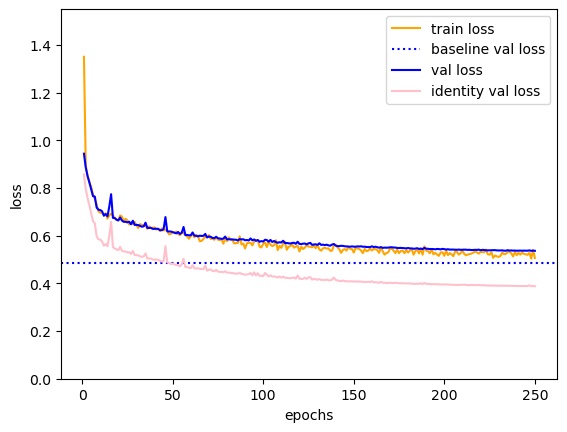

In [137]:
#build model
virus_model = AutoEncoder(
    encoder_layers = [30, 128, 30], #model architecture
    decoder_layers = [], #decoder optional - you can create bottlenecks if you like
    activation='relu',
    swap_p=0.2, #noise parameter
    lr = 0.01,
    lr_decay=0.99,
    batch_size=32,
    logger='ipynb', #special logging for jupyter notebooks
    verbose=False,
    optimizer='sgd',
    scaler='gauss_rank', #gauss rank scaling forces your numeric features into standard normal distributions
    min_cats=0 #Define cutoff for minority categories, default 10
)
virus_model.fit(X_train_v, epochs=250, val=X_val_v)

In [158]:
test_df_v = virus_df.loc[:4]
test_df_v

,rna,rt,double_stranded,negative_sense,positive_sense,enveloped,circular,segmented,cytoplasm,size_KB,...,environment,vector,release_budding,release_lysis,release_other,CE_clathrin,CE_receptor,ce_glycoprotiens,ce_other,samplingEffort
0,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
1,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
2,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
3,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
4,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1


In [159]:
rep = virus_model.get_representation(test_df_v)
rep

tensor([[4.4745e+00, 6.6016e-01, 3.2534e+00, 0.0000e+00, 6.1392e+00, 4.6408e-01,
         0.0000e+00, 2.5343e+00, 4.0723e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.8941e+00, 4.0598e+00, 5.2307e-01, 1.4426e+00, 0.0000e+00,
         9.7101e-03, 3.0562e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2091e+00,
         0.0000e+00, 2.9281e-01, 1.4696e-03, 9.1557e-01, 3.3862e+00, 0.0000e+00],
        [4.4745e+00, 6.6016e-01, 3.2534e+00, 0.0000e+00, 6.1392e+00, 4.6408e-01,
         0.0000e+00, 2.5343e+00, 4.0723e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.8941e+00, 4.0598e+00, 5.2307e-01, 1.4426e+00, 0.0000e+00,
         9.7101e-03, 3.0562e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2091e+00,
         0.0000e+00, 2.9281e-01, 1.4696e-03, 9.1557e-01, 3.3862e+00, 0.0000e+00],
        [4.4745e+00, 6.6016e-01, 3.2534e+00, 0.0000e+00, 6.1392e+00, 4.6408e-01,
         0.0000e+00, 2.5343e+00, 4.0723e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.894

Mammal dfencoder model

In [160]:
#load and look at the data
mammal_df = pd.read_csv('../../data/divide_and_conquer/final_mammal_features_bool.csv')

#this dataset contains nulls and ' ?'. Let's make these all nulls.
mammal_df = mammal_df.map(lambda x: np.nan if x==' ?' else x)
# df.drop(columns=["Unnamed: 0", "scientific name", "alternative name", "taxid"], axis=1, inplace=True)
mammal_df.drop(columns=["hostid","host"], axis=1, inplace=True)

mammal_df.dtypes
mammal_df.head()

,horder,hfamily,longevity,bodyMass,bodyLength,litterpy,littersize,weaning,gestation,smaturity,...,trees_needle,trees_other,veg_herbal,veg_managed,veg_flooded,crop,pasture,mamdiv,land_cover_entropy,urban_agri_entropy
0,monotremata,tachyglossidae,600.0,4499.97,375.00,0.58,1.00,200.0,22.0,556.85,...,0.000000,4.152361,6.489167,0.192986,0.000694,0.000000,0.281135,28.0,1.112279,0.721329
1,didelphimorphia,didelphidae,84.0,1134.75,402.70,2.00,6.20,94.0,12.0,200.88,...,0.002986,1.542014,0.437222,3.518819,0.448819,0.006443,0.037709,180.0,0.332577,0.432043
2,didelphimorphia,didelphidae,52.9,425.81,265.60,3.00,4.60,82.0,71.5,220.25,...,0.002222,1.370556,0.344861,3.552708,0.487431,0.006623,0.033827,178.0,0.321715,0.445816
3,dasyuromorphia,dasyuridae,156.7,8202.25,557.86,1.00,3.00,243.0,26.0,777.31,...,0.377431,4.805556,3.425833,7.328542,0.183750,0.008363,0.157158,34.0,1.179076,0.377121
4,diprotodontia,macropodidae,202.8,11815.75,646.01,1.80,1.01,214.0,29.0,404.77,...,0.000000,32.950903,2.752778,0.583611,0.008403,0.000018,0.021418,47.0,1.016220,0.294432


In [161]:
mammal_train = mammal_df.sample(frac=.8, random_state=42)
mammal_test = mammal_df.loc[~mammal_df.index.isin(mammal_train.index)]

X_train_m = mammal_train
X_val_m = mammal_test

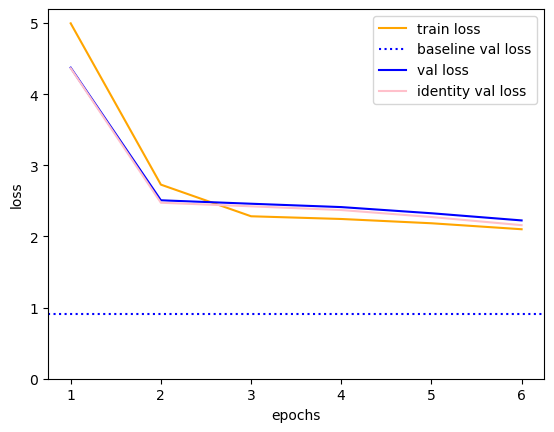

 ... (more hidden) ...

KeyboardInterrupt: 

In [162]:
mammal_model = AutoEncoder(
    encoder_layers = [66, 128, 66], #model architecture
    decoder_layers = [], #decoder optional - you can create bottlenecks if you like
    activation='relu',
    swap_p=0.2, #noise parameter
    lr = 0.01,
    lr_decay=0.99,
    batch_size=32,
    logger='ipynb', #special logging for jupyter notebooks
    verbose=False,
    optimizer='sgd',
    scaler='gauss_rank', #gauss rank scaling forces your numeric features into standard normal distributions
    min_cats=0 #Define cutoff for minority categories, default 10
)
mammal_model.fit(X_train_m, epochs=250, val=X_val_m)

In [163]:
test_m_df = mammal_df.loc[:4]
test_m_df

,horder,hfamily,longevity,bodyMass,bodyLength,litterpy,littersize,weaning,gestation,smaturity,...,trees_needle,trees_other,veg_herbal,veg_managed,veg_flooded,crop,pasture,mamdiv,land_cover_entropy,urban_agri_entropy
0,monotremata,tachyglossidae,600.0,4499.97,375.00,0.58,1.00,200.0,22.0,556.85,...,0.000000,4.152361,6.489167,0.192986,0.000694,0.000000,0.281135,28.0,1.112279,0.721329
1,didelphimorphia,didelphidae,84.0,1134.75,402.70,2.00,6.20,94.0,12.0,200.88,...,0.002986,1.542014,0.437222,3.518819,0.448819,0.006443,0.037709,180.0,0.332577,0.432043
2,didelphimorphia,didelphidae,52.9,425.81,265.60,3.00,4.60,82.0,71.5,220.25,...,0.002222,1.370556,0.344861,3.552708,0.487431,0.006623,0.033827,178.0,0.321715,0.445816
3,dasyuromorphia,dasyuridae,156.7,8202.25,557.86,1.00,3.00,243.0,26.0,777.31,...,0.377431,4.805556,3.425833,7.328542,0.183750,0.008363,0.157158,34.0,1.179076,0.377121
4,diprotodontia,macropodidae,202.8,11815.75,646.01,1.80,1.01,214.0,29.0,404.77,...,0.000000,32.950903,2.752778,0.583611,0.008403,0.000018,0.021418,47.0,1.016220,0.294432


In [164]:
rep = mammal_model.get_representation(test_m_df)
rep

tensor([[1.8400e+00, 4.1672e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         9.0878e-01, 0.0000e+00, 1.2915e+00, 4.9864e+00, 1.6596e+00, 2.1514e+00,
         0.0000e+00, 0.0000e+00, 1.0592e+00, 0.0000e+00, 0.0000e+00, 5.3389e+00,
         4.4075e-01, 1.1541e+00, 0.0000e+00, 0.0000e+00, 5.3250e-01, 8.6933e-01,
         2.0306e-01, 0.0000e+00, 0.0000e+00, 6.5867e+00, 3.4124e+00, 6.3443e-01,
         2.9775e+00, 0.0000e+00, 0.0000e+00, 2.4426e+00, 1.4195e+00, 3.1308e-01,
         3.0243e+00, 2.5642e+00, 0.0000e+00, 9.8983e-01, 2.5981e+00, 0.0000e+00,
         8.5725e-01, 1.4830e+00, 5.4545e+00, 0.0000e+00, 2.5533e-01, 6.7818e-01,
         6.4638e+00, 1.4787e+00, 0.0000e+00, 2.4922e+00, 5.9499e-01, 0.0000e+00,
         4.3259e-01, 5.0376e-01, 2.4995e-01, 1.4323e+00, 0.0000e+00, 1.8965e+00,
         6.3048e+00, 8.5261e-01, 3.6994e+00, 0.0000e+00, 1.5341e+00, 2.2638e-01],
        [8.7234e-01, 5.5196e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0495e+00, 0.0000

## Mammalian Data from Divide & Conquer

In [145]:
host_features_path = os.path.join('..', '..', 'data', 'divide_and_conquer', 'final_mammal_features_bool.csv')
viral_features_path = os.path.join('..', '..', 'data', 'divide_and_conquer', 'final_virus_features_bool.csv')
interactions_path = os.path.join('..', '..', 'data', 'divide_and_conquer', 'final_interactions.csv')

host_feats = pd.read_csv(host_features_path)
viral_feats = pd.read_csv(viral_features_path)
interactions = pd.read_csv(interactions_path)

This implementation is informed by the following PyG [tutorial](https://medium.com/@pytorch_geometric/link-prediction-on-heterogeneous-graphs-with-pyg-6d5c29677c70). The pathogen and host ID values uniquely identify the entities in our study, but they're also massive numbers. For data compactness, we will create a mapping from those to consecutive values in the range [0, num_entries].

In [146]:
unique_host_ids = host_feats['hostid'].unique()
host_id_mapping = pd.DataFrame(data={
    'hostID': unique_host_ids,
    'mappedID': pd.RangeIndex(len(unique_host_ids))
})
print("Head of the host id mapping DF:\n", host_id_mapping.head())

unique_virus_ids = viral_feats['pathogenid'].unique()
virus_id_mapping = pd.DataFrame(data={
    'virusID': unique_virus_ids,
    'mappedID': pd.RangeIndex(len(unique_virus_ids))
})
print("\nHead of the virus id mapping DF:\n", virus_id_mapping.head())

Head of the host id mapping DF:
     hostID  mappedID
0  3433010         0
1  3433020         1
2  3433026         2
3  3433081         3
4  3433091         4

Head of the virus id mapping DF:
    virusID  mappedID
0  1195280         0
1  1195281         1
2  1195282         2
3  1195283         3
4  1195284         4


Now for interactions, we will create a torch matrix of shape ```(2, num_interactions)```. To do this, we will first use merges to get the corresponding mappedIDs.

In [147]:
interactions_host_ids = pd.merge(interactions['hostID'], host_id_mapping, left_on='hostID', right_on='hostID', how='left')
interactions_host_ids = torch.from_numpy(interactions_host_ids['mappedID'].values)

interactions_virus_ids = pd.merge(interactions['pathogenID'], virus_id_mapping, left_on='pathogenID', right_on='virusID', how='left')
interactions_virus_ids = torch.from_numpy(interactions_virus_ids['mappedID'].values)

edge_index_virus_to_host = torch.stack([interactions_virus_ids, interactions_host_ids], dim=0)
print(edge_index_virus_to_host.shape)

torch.Size([2, 6192])


PyG's tutorial for link prediction on heterogenous graphs recommends using their ```HeteroData``` object instead of a traditional Torch ```Dataset```.

In [ ]:
from torch_geometric.data import HeteroData
import torch_geometric.transforms as T

device = 'cuda' if torch.cuda.is_available() else 'cpu'

data = HeteroData()

# For each class, store the node ids and the features. Features will be of shape (# nodes, # features)
data['virus'].node_id = torch.arange(len(unique_virus_ids))
# NOTE: this data doesn't have a one-hot encoding for the taxonomy. Could maybe capture this with get_dummies()
# problem is, there are like more than a 1000 of these.
temp_df_v =viral_feats.drop(columns=['pathogenid', 'ncbi.name'])
data['virus'].x = virus_model.get_representation(temp_df_v)

# TODO: will need to go back and make both one-hot and ordinal versions of this data for the horder and hfamily features
# That will add another 124 columns if one-hot encoded.  
# TODO: Will also need to come back and deal with the 'status' feature. It says whether the animal is wild or domesticated
# didn't realize that this wasn't already encoded better
data['host'].node_id = torch.arange(len(unique_host_ids))
temp_df_m =host_feats.drop(columns=['hostid', 'host'])

data['host'].x = mammal_model.get_representation(temp_df_m)

# Add the edges
data['virus', 'infects', 'host'].edge_index = edge_index_virus_to_host

data = T.ToUndirected()(data)  # Add the reverse edges
print(data)

HeteroData(
  virus={
    node_id=[1885],
    x=[1885, 30],
  },
  host={
    node_id=[1312],
    x=[1312, 66],
  },
  (virus, infects, host)={ edge_index=[2, 6192] },
  (host, rev_infects, virus)={ edge_index=[2, 6192] }
)


In [149]:
split_transform = T.RandomLinkSplit(
    num_val=0.1,
    num_test=0.1,
    disjoint_train_ratio=0.3,
    neg_sampling_ratio=2.0,
    add_negative_train_samples=False,
    edge_types=('virus', 'infects', 'host'),
    rev_edge_types=('host', 'rev_infects', 'virus')
)

train_data, val_data, test_data = split_transform(data)

print('Train Data:')
print(train_data)
print('\nVal Data:')
print(val_data)
print('\nTest Data:')
print(test_data)

Train Data:
HeteroData(
  virus={
    node_id=[1885],
    x=[1885, 30],
  },
  host={
    node_id=[1312],
    x=[1312, 66],
  },
  (virus, infects, host)={
    edge_index=[2, 3468],
    edge_label=[1486],
    edge_label_index=[2, 1486],
  },
  (host, rev_infects, virus)={ edge_index=[2, 3468] }
)

Val Data:
HeteroData(
  virus={
    node_id=[1885],
    x=[1885, 30],
  },
  host={
    node_id=[1312],
    x=[1312, 66],
  },
  (virus, infects, host)={
    edge_index=[2, 4954],
    edge_label=[1857],
    edge_label_index=[2, 1857],
  },
  (host, rev_infects, virus)={ edge_index=[2, 4954] }
)

Test Data:
HeteroData(
  virus={
    node_id=[1885],
    x=[1885, 30],
  },
  host={
    node_id=[1312],
    x=[1312, 66],
  },
  (virus, infects, host)={
    edge_index=[2, 5573],
    edge_label=[1857],
    edge_label_index=[2, 1857],
  },
  (host, rev_infects, virus)={ edge_index=[2, 5573] }
)


In [150]:
from torch_geometric.loader import LinkNeighborLoader

# NOTE: Not exactly sure what these two lines are doing - apparently define seed edges???
edge_label_index = train_data['virus', 'infects', 'host'].edge_label_index
edge_label = train_data['virus', 'infects', 'host'].edge_label

train_loader = LinkNeighborLoader(
    data=train_data,
    num_neighbors=[20, 10],
    neg_sampling_ratio=2.0,
    edge_label_index=(('virus', 'infects', 'host'), edge_label_index),
    edge_label=edge_label,
    batch_size=128,
    shuffle=True
)

print("Example of a training mini-batch:")
print(next(iter(train_loader)))

# Also set up the loader for the validation set so that we can track the performance on that as we go
edge_label_index_val = val_data['virus', 'infects', 'host'].edge_label_index
edge_label_val = val_data['virus', 'infects', 'host'].edge_label
val_loader = LinkNeighborLoader(
    data=val_data,
    num_neighbors=[20, 10],
    edge_label_index=(('virus', 'infects', 'host'), edge_label_index_val),
    edge_label=edge_label_val,
    batch_size=128,
    shuffle=True
)
print("\nExample of a validation mini-batch:")
print(next(iter(val_loader)))

Example of a training mini-batch:
HeteroData(
  virus={
    node_id=[1019],
    x=[1019, 30],
    n_id=[1019],
  },
  host={
    node_id=[756],
    x=[756, 66],
    n_id=[756],
  },
  (virus, infects, host)={
    edge_index=[2, 2211],
    edge_label=[384],
    edge_label_index=[2, 384],
    e_id=[2211],
    input_id=[128],
  },
  (host, rev_infects, virus)={
    edge_index=[2, 2128],
    e_id=[2128],
  }
)

Example of a validation mini-batch:
HeteroData(
  virus={
    node_id=[807],
    x=[807, 30],
    n_id=[807],
  },
  host={
    node_id=[632],
    x=[632, 66],
    n_id=[632],
  },
  (virus, infects, host)={
    edge_index=[2, 1957],
    edge_label=[128],
    edge_label_index=[2, 128],
    e_id=[1957],
    input_id=[128],
  },
  (host, rev_infects, virus)={
    edge_index=[2, 1820],
    e_id=[1820],
  }
)


/home/jqian/miniconda3/envs/avian_zoonosis/lib/python3.12/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [151]:
from models.standard import StandardModel

# For the mammalian data, the number of features is like 30 and 60.
model = StandardModel(hidden_channels=64, metadata=data.metadata())
print(model)

StandardModel(
  (gnn): GraphModule(
    (conv1): ModuleDict(
      (virus__infects__host): SAGEConv((-1, -1), 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv((-1, -1), 64, aggr=mean)
    )
    (conv2): ModuleDict(
      (virus__infects__host): SAGEConv(64, 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv(64, 64, aggr=mean)
    )
    (conv3): ModuleDict(
      (virus__infects__host): SAGEConv(64, 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv(64, 64, aggr=mean)
    )
    (conv4): ModuleDict(
      (virus__infects__host): SAGEConv(64, 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv(64, 64, aggr=mean)
    )
    (conv5): ModuleDict(
      (virus__infects__host): SAGEConv(64, 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv(64, 64, aggr=mean)
    )
    (conv6): ModuleDict(
      (virus__infects__host): SAGEConv(64, 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv(64, 64, aggr=mean)
    )
    (conv7): ModuleDict(
      (virus__infect

In [152]:
from tqdm import tqdm
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score

print('Selected device: ', device)

model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_loss_hist = []
val_loss_hist = []
for epoch in range(10):
    epoch_loss = epoch_size = 0

    model.train()
    for sampled_data in tqdm(train_loader):
        optimizer.zero_grad()

        sampled_data = sampled_data.to(device)
        pred = model(sampled_data)
        
        labels = sampled_data['virus', 'infects', 'host'].edge_label
        loss = F.binary_cross_entropy_with_logits(pred, labels)
        
        loss.backward()
        optimizer.step()

        epoch_loss += float(loss) * pred.numel()  # Default reduction is mean so multiplying by num elements recovers sum
        epoch_size += pred.numel()

    if epoch % 1 == 0:  # This is to control how often we validate. For now do every epoch since num epochs is low
        # NOTE: for now I'm just using AUROC since it's standard, but we should be using AUCPR instead 
        model.eval()
        val_preds = []
        val_labels = []
        for sampled_data in tqdm(val_loader):
            with torch.no_grad():
                sampled_data = sampled_data.to(device)
                val_preds.append(model(sampled_data))
                val_labels.append(sampled_data['virus', 'infects', 'host'].edge_label)
            
        val_preds = torch.cat(val_preds, dim=0)
        val_labels = torch.cat(val_labels, dim=0)
        val_loss = F.binary_cross_entropy_with_logits(val_preds, val_labels).cpu().item()
        val_loss_hist.append(val_loss)
        auroc = roc_auc_score(val_labels.cpu().numpy(), val_preds.cpu().numpy())
    
    print(f'Epoch: {epoch}, Train Loss: {epoch_loss / epoch_size:.4f}, Validation Loss: {val_loss}, AUROC: {auroc}')
    train_loss_hist.append(epoch_loss / epoch_size)

Selected device:  cpu


 ... (more hidden) ...
 ... (more hidden) ...


Epoch: 0, Train Loss: 0.6263, Validation Loss: 0.5543832182884216, AUROC: 0.7828758668027278


 ... (more hidden) ...
 ... (more hidden) ...


Epoch: 1, Train Loss: 0.5272, Validation Loss: 0.5470283031463623, AUROC: 0.7913331471626811


 ... (more hidden) ...
 ... (more hidden) ...


Epoch: 2, Train Loss: 0.4780, Validation Loss: 0.438941091299057, AUROC: 0.8642163476971823


 ... (more hidden) ...
 ... (more hidden) ...


Epoch: 3, Train Loss: 0.3926, Validation Loss: 0.36226028203964233, AUROC: 0.9095236728163879


 ... (more hidden) ...
 ... (more hidden) ...


Epoch: 4, Train Loss: 0.3414, Validation Loss: 0.322455495595932, AUROC: 0.9382557201802896


 ... (more hidden) ...
 ... (more hidden) ...


Epoch: 5, Train Loss: 0.3170, Validation Loss: 0.3174589276313782, AUROC: 0.9298310631823177


 ... (more hidden) ...
 ... (more hidden) ...


Epoch: 6, Train Loss: 0.3116, Validation Loss: 0.2972744107246399, AUROC: 0.9399638794136146


 ... (more hidden) ...
 ... (more hidden) ...


Epoch: 7, Train Loss: 0.2920, Validation Loss: 0.29503798484802246, AUROC: 0.953129363374665


 ... (more hidden) ...
 ... (more hidden) ...


Epoch: 8, Train Loss: 0.2910, Validation Loss: 0.26172444224357605, AUROC: 0.9554143036478138


 ... (more hidden) ...
 ... (more hidden) ...

Epoch: 9, Train Loss: 0.2674, Validation Loss: 0.2668677866458893, AUROC: 0.9527979100169381


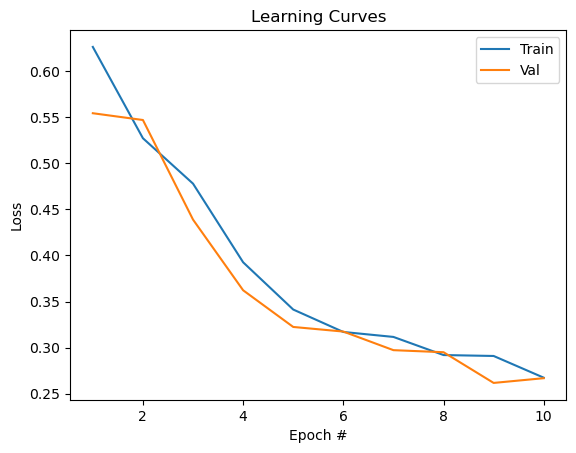

In [153]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(np.arange(1, 11), train_loss_hist, label='Train')
plt.plot(np.arange(1, 11), val_loss_hist, label='Val')
plt.title('Learning Curves')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()
plt.show()

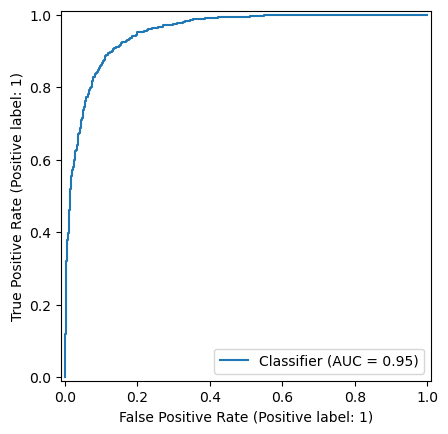

In [154]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(val_labels.cpu().numpy(), val_preds.cpu().numpy())
plt.show()